# 13 Naive Bayes classifier

Part of ["Introduction to Data Science" course](https://github.com/kupav/data-sc-intro) by Pavel Kuptsov, [kupav@mail.ru](mailto:kupav@mail.ru)

Recommended reading for this section:

1. Grus, J. (2019). Data Science From Scratch: First Principles with Python (Vol. Second edition). Sebastopol, CA: O’Reilly Media
1. Muller, A and Guido, S (2017). Introduction to Machine Learning with Python. O'Reilly

The following Python modules will be required. Make sure that you have them installed.
- `numpy`
- `matplotlib`
- `sklearn`
- `csv`
- `requests`
- `collections`
- `re`
- `io`
- `zipfile`

## Lesson 1

### Remember probabilities and the Bays' theorem

Assume we have a stochastic experiment like rolling a dice or tossing a coin.

Consider an event $A$, e.g., an even number has shown up.

If there are totally $N$ outcomes of the experiment and $N_A$ of them correspond to the event $A$.

Then the probability of $A$ is

$$
P(A) = \frac{N_A}{N}
$$

$P(A)$ is also called marginal probability.

For example if we have a dice and the event $A$ is showing up an even number then totally there are $N=6$ 
outcomes and $N_A=3$ of them fulfills $A$.

$$
P(A) = \frac{3}{6}=\frac{1}{2}
$$

Consider two events $A$ and $B$. Assume we have a box of balls that are blue and red. Let an event $A$ be a blind taking of a red ball without returning it back. And $B$ is a blind taking of another red ball.

Event $B$ and $A$ are dependent since the probability of $B$ depends on the occurrence of $A$. If $A$ has not occurred then $P(B)$ is higher (because more red balls left).

But if after taking a ball for the first time we return it back the event $B$ will be independent on $A$.

Joint probability of $A$ and $B$ is the probability that both events occur simultaneously. 

If they are independent then the joint probability is mere the product of their probabilities:

$$
P(A,B)=P(A)P(B)
$$

And when the events are dependent the joint probability is computed via their conditional probabilities:

$$
P(A, B) = P(B | A) P(A)
$$

Here $P(B|A)$ is the conditional probability of $B$ provided that $A$ has occurred. 

Since the all dependences in nature are always two sided (if $A$ influences $B$ than $B$ also influences $A$) we can also consider the reversed formula for the joint probability:

$$
P(A, B) = P(A | B) P(B)
$$

Now $P(A | B)$ is the conditional probability of $A$ provided that $B$ has occurred. 

Thus

$$
P(B | A) P(A) = P(A | B) P(B)
$$

Assume we know $P(A | B)$ and want to find $P(B | A)$. It is found via Bayes' theorem:

$$
P(B | A) = \frac{P(A | B) P(B)}{P(A)}
$$

If the marginal probability $P(A)$ is unknown in advance, it can be found via the law of total probability.

$$
P(A) = P(A | B) P(B) + P(A | \bar B) P(\bar B)
$$

Here over bar means negation: $\bar B$ means that $B$ has not occurred.

Gathering these equations together we obtain more detailed form of Bayes' theorem:

$$
P(B | A) = \frac{P(A | B) P(B)}{P(A | B) P(B) + P(A | \bar B) P(\bar B)}
$$

### Idea of the naive Bayes classifier

Let us remember that the classification mean finding an appropriate label for a new data record.

Assume that we have a dataset of $n$ features (table with $n$ columns). 

Let us denote as $(A_1, A_2, \ldots A_n)$ a row from this table. In the other word, this is a record describing one entity in the dataset. 

The data are assumed to be categorical. For example $A_1$ can denote a size of a fruit: "big", "medium" or "small", and $A_2$ can encode its color like "red", "green" or "yellow". Or something like that.

In general $A_i$ can have an integer value from a certain range. For the sake of simplicity in what follows we will often assume that $A_i$ can be either 0 or 1.

Let us denote via $B$ a class label. For example it can be "apple", or "orange" or "tomato". 

In general this is also an integer that encodes a class.

Since $A_i$ and $B$ are categorical and have finite ranges of integer values in principle we can consider all possible combinations
of $(A_1, A_2, \ldots A_n)$.

For example if $A_i$ can be 0 or 1 and there are three features, i.e., $n=3$, there are 8 combinations:
- 000
- 001
- 010
- 011
- 100
- 101
- 110
- 111

If we are able to collect all combinations and assign a label $B$ to each one then we do not need machine learning at all.

If a new record is obtained we just can look at the dataset and find the corresponding label.

But if $n$ is large it is impossible to collect and label all possible combinations.

How can we classify a new data record $(A_1, A_2, \ldots A_n)$ if we have an incomplete labeled dataset that does not contain this combination?

When we solve this problem using a naive Bayes classifiers we compute probabilities that a new data record belongs to each of the existing classes and then choose the one with the largest value of the probability.

This approach is also known as maximum likelihood estimation.

The staring point of the analysis is a Bayes' theorem. This theorem allows to compute conditional probability. 

However the naive Bayes classifier can compute only an approximate estimation of the probability. 

Thus this is usually called likelihood instead of probability.

According to the Bayes theorem

$$
P(B_j | A_1,A_2,\ldots A_n) = \frac{P(A_1,A_2,\ldots A_n | B_j) P(B_j)}{P(A_1,A_2,\ldots A_n)}
$$

To identify a class we need $P(B_j | A_1,A_2,\ldots A_n)$ for all classes $B_j$ where $j$ runs through all class numbers.

Accordingly, conditional probabilities $P(A_1,A_2,\ldots A_n | B_j)$ are required.

In principal it is clear how to compute them from the dataset: take the subset that has label $B_j$ and compute relative frequencies 
of every combination for $(A_1,A_2,\ldots A_n)$.

But as we already mentioned above if we really have a labeled dataset 
where all the combinations of $(A_1,A_2,\ldots A_n)$ can be found, we do not need a classifier. 

For the most of practically interesting problems such table would be really huge.

The problem is how to estimate $P(B_j | A_1,A_2,\ldots A_n)$ without having a dataset with all combinations of $A_i$?

Before we continue let us consider how number of possible combinations grows with the number of features $n$.

We assume that our features are binary, i.e., each column can contain only 0's or 1's

Thus a string of 0's and 1's represents a data record. 

How many different combinations can be for a given $n$?

If $n=1$  there are two combinations: 
- '0'
- '1'

If $n=2$ we take each of size 1 string and append one more symbol to the left, either 0 or 1. Two combinations are repeated twice. Thus totally there are 4 combinations
- '00'
- '01'
- '10'
- '11'

If $n=3$: take all previous 4 strings and repeat each two times with 0 or 1 appended:
- '000'
- '001'
- '010'
- '011'
- '100'
- '101'
- '110'
- '111'

In general: each new symbol doubles the number of combinations. String of $n$ symbols has 2 to the power of $n$ combinations.
- $n=1$: $2=2^1$
- $n=2$: $2\times 2=2^2$
- $n=3$: $2\times 2\times 2=2^3$
- $n$: $2\times 2\times\ldots\times 2=2^n$

All these strings can be treated as a binary numbers. 

It is much simpler to substitute them them with the corresponding decimal numbers. 

Now the question: if we have $n$ binary features how large dataset can be to have all possible combinations in it?

Obviously it must have size $2^n$ provided that each combinations appears exactly one time.

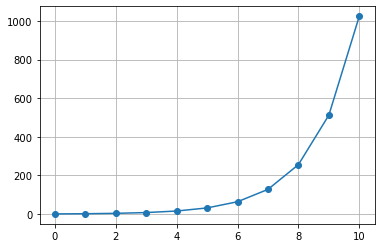

In [2]:
import numpy as np
import matplotlib.pyplot as plt

ns = np.arange(0, 11)
sz = 2**ns

fig, ax = plt.subplots()
ax.plot(ns, sz, 'o-')
ax.grid();

The required size grows very fast.

And if we collect a dataset more or less at random the size will be even larger since some combinations can repeat.

Lets us generate a dataset at random and see when we can have each combinations of features at least once.

In [ ]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
rng = np.random.default_rng(seed=0)

nn = 6             # model number of binary features
size_short = 100   # small dataset size
size_long  = 1000  # lager dataset size
data_short = rng.integers(2**nn, size=size_short)
data_long = rng.integers(2**nn, size=size_long)

count_short = Counter(data_short)
count_long  = Counter(data_long)

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(14, 8))

axs[0].bar(list(count_short), list(count_short.values()))
axs[0].set_title(f'range of data {2**nn}, size of the datset {size_short}')
axs[0].set_xlim([0, 2**nn])
axs[1].bar(list(count_long), list(count_long.values()))
axs[1].set_title(f'range of data {2**nn}, size of the datset {size_long}')
axs[1].set_xlim([0, 2**nn]);

We see that if we have $n=6$ features there are 64 combinations and the dataset of 100 elements is sparse: not all variants appear.
(Let us remember we consider combinations of 0's and 1's and have 6 of them. Integers along the horizontal axis enumerate these combinations).

For the dataset of the length 1000 there are no empty sites.

But if we increase $n$ we will see some again.

Let us return to our problem. 

We have a labeled dataset that does not include all combinations of $(A_1,A_2,\ldots A_n)$ but want to have a machine learning 
model that can assign a correct label to every possible combination.

When we build a naive Bayes classifier we solve the problem assuming that all features are independent on each other.

That is why the classifier is naive. Intuitively we expect that the features can correlate with each other but ignore it.

For example assume that one column of the dataset contains temperature sensations like "hot", "mild" or "cool" and another column is snowfall that can be either "yes" or "no". 

We can expect that air temperature influences the emergence of a snowfall. However a naive Bayes classifier ignores it.

But still it works. The main reason is that the dependencies that we omit are usually not so strong and influential.

The benefit of the naive assumption is as follows:

In the Bayes' equation

$$
P(B_j | A_1,A_2,\ldots A_n) = \frac{P(A_1,A_2,\ldots A_n | B_j) P(B_j)}{P(A_1,A_2,\ldots A_n)}
$$

we need the conditional probability $P(A_1,A_2,\ldots A_n | B_j)$. If the features are independent we can easily compute it. 

Let us remember: joint probability of the independent events is a product 
of their marginal probabilities.

$$
P(A_1,A_2,\ldots A_n | B_j) = P(A_1 | B_j) P(A_2 | B_j) \ldots P(A_n | B_j)
$$

To perform classification we will not need the denominator of the Bayes formula, but it can also be easily computed:

$$
P(A_1,A_2,\ldots A_n) = P(A_1) P(A_2) \ldots P(A_n)
$$

Why it helps? Because we can easily collect the probabilities $P(A_i | B_j)$ just by counting values in columns. 

The huge set is not needed for it. 

And then we can construct every combination of features $(A_1,A_2,\ldots A_n)$ and estimate its probability.

Thus the naive Bayes classifier computes likelihood (estimated probability) that a feature vector $(A_1,A_2,\ldots A_n)$  belongs to the class $B_j$ according to the formula:

$$
P(B_j | A_1,A_2,\ldots A_n) \propto P(A_1 | B_j) P(A_2 | B_j) \ldots P(A_n | B_j) P(B_j)
$$

Here $P(A_i | B_j)$ and $P(B_j)$ are computed from the training data as relative frequencies. 

The symbol "$\propto$" means "proportional". We use it instead of equality sign because we have omitted the denominator.

We have to compute $P(B_j | A_1,A_2,\ldots A_n)$ for all $j$ and since the denominator $P(A_1) P(A_2) \ldots P(A_n)$ does not depend on $B_j$ it will be the same for all $j$. That is why we omit it.

Then we compare likelihoods $P(B_j | A_1,A_2,\ldots A_n)$ and find a class $B_j$ that have the largest one. This will be the label for the feature vector $(A_1,A_2,\ldots A_n)$. 

Mathematically it reads as

$$
B_j = \mathop{\mathrm{argmax}}_{\text{$B_j$ runs through all classes}} P(A_1 | B_j) P(A_2 | B_j) \ldots P(A_n | B_j) P(B_j)
$$

### Toy example of a binary classifier

Assume that we have a corpus of eleven email messages labeled as spam or ham. 

(Ham in this context is a standard term for a non-spam message. 'SPAM' is a brand of canned cooked pork that became famous due to its annoying commercial).

Five of them are labeled as spam and six are ham.

In these messages we find four keywords "million", "winner", "award" and "brand". We hope that their presence or absence 
in a message can be related with its class, spam or ham.

In the table below each row represents one email. Symbol 1 in the column means that the corresponding word, usually it is called token, is encountered in this message and 0 means that this token is absent.

List of all tokes is called vocabulary.

For example the first email contains all four tokens, the second one contains all except "award". In the third message token "million" is absent and so on.

Such representation of texts is called "bag of words". 

| #  | million | winner | award | brand | label |
|----|---------|--------|-------|-------|-------|
| 1  | 1       | 1      | 1     | 1     | spam  |
| 2  | 1       | 1      | 0     | 1     | spam  |
| 3  | 0       | 1      | 1     | 1     | spam  |
| 4  | 0       | 1      | 0     | 0     | spam  |
| 5  | 0       | 0      | 1     | 0     | spam  |
| 6  | 1       | 1      | 0     | 1     | ham   |
| 7  | 0       | 0      | 0     | 0     | ham   |
| 8  | 0       | 1      | 0     | 0     | ham   |
| 9  | 0       | 0      | 0     | 0     | ham   |
| 10 | 0       | 0      | 1     | 0     | ham   |
| 11 | 1       | 1      | 1     | 0     | ham   |

Since we have four tokens and each one can be or can not be in the message there are $2^4=16$ combinations. 

But also we suspect that
four tokens is not enough for unambiguously identify a class. 

It means that some combinations can appear both in spam and in ham classes, e.g., see messages 2 and 6.

We are going to create a naive Bayes classifier for this dataset.

Let us compute conditional probabilities for tokens to appear in spam messages:
$P(M|S)$, $P(W|S)$, $P(A|S)$, $P(B|S)$.

Similar we find probabilities for tokens in ham messages:
$P(M|H)$, $P(W|H)$, $P(A|H)$, $P(B|H)$.

Also we will need marginal probabilities of spam and ham $P(S)$ and $P(H)$.

In [ ]:
# these are columns of the table above
million = np.array([1,1,0,0,0,1,0,0,0,0,1])
winner  = np.array([1,1,1,1,0,1,0,1,0,0,1])
award   = np.array([1,0,1,0,1,0,0,0,0,1,1])
brand   = np.array([1,1,1,0,0,1,0,0,0,0,0])
label = np.array(['spam'] * 5 + ['ham'] * 6)

Technical remark. How can we filter values from `numpy` array: 

In [ ]:
# Content of two arrays
print(million)
print(label)

In [ ]:
# This statement compare 'orange' with every element of array
print(label=='spam')  

In [ ]:
# If we pass array of True and False as another array index we extact only those values that 
# correspond to True
print(million[label=='spam'])

Helper function: we pass it an array and a label. It filters corresponding elements of an array and find a relative frequency.

In [ ]:
def prob(arr, lab):
    a = arr[label==lab]
    return sum(a) / len(a)

We compute the probabilities
- 'million' in spam $P(M|S)$
- 'winner' in spam $P(W|S)$
- 'award' in spam $P(A|S)$
- 'brand' in spam $P(B|S)$

In [ ]:
prob_m_s = prob(million, 'spam')
prob_w_s = prob(winner, 'spam')
prob_a_s = prob(award, 'spam')
prob_b_s = prob(brand, 'spam')

Now the probabilities for ham
- 'million' in ham $P(M|H)$
- 'winner' in ham $P(W|H)$
- 'award' in ham $P(A|H)$
- 'brand' in ham $P(B|H)$

In [ ]:
prob_m_h = prob(million, 'ham')
prob_w_h = prob(winner, 'ham')
prob_a_h = prob(award, 'ham')
prob_b_h = prob(brand, 'ham')

Marginal probabilities of spam and ham

In [ ]:
prob_marg_s = len(label[label=='spam']) / len(label)
prob_marg_h = 1 - prob_marg_s

One more helper function: it returns `prob` if `x==1` and `(1-prob)` when `x==0`:

In [ ]:
def pb(prob, x):
    return prob if x == 1 else (1-prob)

Now all data of the model is ready and we can do predictions:

In [ ]:
m_test, w_test, a_test, b_test = 1, 1, 0, 1  # this is a new data record

lh_s = pb(prob_m_s, m_test) * pb(prob_w_s, w_test) * pb(prob_a_s, a_test) * pb(prob_b_s, b_test) * prob_marg_s
lh_h = pb(prob_m_h, m_test) * pb(prob_w_h, w_test) * pb(prob_a_h, a_test) * pb(prob_b_h, b_test) * prob_marg_h
pred = 'spam' if lh_s > lh_h else 'ham'
print(pred)

In [ ]:
m_test, w_test, a_test, b_test = 1, 0, 0, 1  # this is a new data record

lh_s = pb(prob_m_s, m_test) * pb(prob_w_s, w_test) * pb(prob_a_s, a_test) * pb(prob_b_s, b_test) * prob_marg_s
lh_h = pb(prob_m_h, m_test) * pb(prob_w_h, w_test) * pb(prob_a_h, a_test) * pb(prob_b_h, b_test) * prob_marg_h
pred = 'spam' if lh_s > lh_h else 'ham'
print(pred)

### Technical remarks before creating the naive Bayes classifier

Now are going to create a fully functional naive Bayes classifier.

But before doing that we need to make some technical remarks.

For our purposes it will be more convenient to use `defaultdict` instead of a plain Python dictionary.

If a plain dictionary does not have a key its reading causes an error, and reading an absent key from `defaultdict` returns a default value.

In [ ]:
d1 = dict()
d1['one'] = 0
try:
    d1['one'] += 1  # it's ok, since we already initialized this key
    d1['two'] += 1  # it will be an error since key 'two' is undefined
    print("Finished successfully")  # this line will not be executed
except KeyError as e:
    print("KeyError", e)

In [ ]:
from collections import defaultdict
d2 = defaultdict(int)
d2['one'] = 0
try:
    d2['one'] += 1  # it's ok, since we already initialized this key
    d2['two'] += 1  # it is also ok since default value of int (zero) will be assumed 
    print("Finished successfully") 
except KeyError as e:
    print("KeyError", e)  # this line will not be executed

Let us remember the Python sets.

A set does not allow duplicates. Thus when a list is converted to a set, all duplicates are removed.

Then the set can be converted back to a list if required.

In [ ]:
s1 = ['one', 'one', 'one', 'two', 'two', 'three']
print(s1)
s2 = set(s1)
print(s2)
s3 = list(s2)
print(s3)

Sets are convenient when we need to store only unique values.

In [ ]:
vocab = set()
print(vocab)
vocab.add("one")
print(vocab)
vocab.add("one")
print(vocab)
vocab.update(["one", "two", "three"])
print(vocab)

We can check if a value belong to a set using `in` operator:

In [ ]:
print('one' in vocab)
print('one' not in vocab)
print('once' not in vocab)

Let us remember regular expressions. 

Pattern "\[a-z'\]" matches any letter or apostrophe. And if we add plus like this: "\[a-z'\]+" it means that the pattern matches 
one or more occurrences of the symbols. This pattern is the simplest way to match words in a text.

Usually we ignore the difference between small and capital letters. Thus it is convenient to convert the text to the lower 
case using `.lower()` method of strings.

In [ ]:
import re

txt = """I've a cat named Vesters,
And he eats all day.
He always lays around,
And never wants to play.
"""

rge = re.compile(r"[a-z']+")
print(rge.findall(txt.lower()))

Two final technical remarks: We will compute probabilities of a word $W_i$ to appear in spam and in ham messages. 

Assume that this word appears only in spam messages. Then the probability to see it in ham messages will be zero.

Since we compute the product of probabilities $P(W_1|H)P(W_2|H)P(W_3|H)\ldots$ vanishing of one of the elements, say $P(W_2|H)=0$, zeroing the whole product. 

In this case all messages with $W_i$ will always be classified as spam since the opposite probability will always be zero.

To avoid it we add a pseudocount $k$ when compute the probabilities:

$$
P(W_i | S) = \frac{k + \text{number of spam messages with $W_i$}}{2k + \text{total number of spam messages}}
$$

Usually $k=1$.

To perform a classification of a message that contains a set of tokes (words)
$(W_1, W_2, \ldots W_n)$ we need to compute likelihoods that it is a spam and a ham:

$$
P(S | W_1,W_2,\ldots W_n) \propto P(W_1 | S) P(W_2 | S) \ldots P(W_n | S) P(S)
$$

$$
P(H | W_1,W_2,\ldots W_n) \propto P(W_1 | H) P(W_2 | H) \ldots P(W_n | H) P(H)
$$

Then if $P(S | W_1,W_2,\ldots W_n) > P(H | W_1,W_2,\ldots W_n)$ we classify it as a spam and this is a ham in the other case.

The expressions contains a lot of multiplications:

$$
P(W_1 | S) P(W_2 | S) \ldots P(W_n | S) P(S), \; P(W_1 | H) P(W_2 | H) \ldots P(W_n | H) P(H)
$$

Such computations are numerically unstable. 

We can easily obtain an underflow when values approach zero. Numerical errors can enormously grow.

We can avoid it by using logarithms. Let us remember:

$$
\log(a \times b) = \log a + \log b
$$

It means that if we sum logarithms of the factors we will have a logarithm of their product.

Given the logarithms of the probabilities we do not need to compute back the probabilities themselves. 

Since we want to compare the probabilities we will collect sums of logarithms and compare them.

### The naive Bayes classifier

Let us now create a class that implements the naive Bayes classifier.

In [ ]:
from collections import defaultdict
import re
import numpy as np

class NaiveBayes:
    def __init__(self, k, drop_short):
        """
        k - pseudocount, usually 1
        drop_short - drop too short tokens
        """
        self.k = k
        self.vocab = set()  # vocabulary, i.e., set of all seen tokens
        self.token_in_spam = defaultdict(int)   # counters of tokesn in spam
        self.token_in_ham = defaultdict(int)    # ... and in ham messages
        self.pcond_spam = self.pcond_ham = None # conditional probabilities of tokesn, will be computed after training
        self.spam_total = self.ham_total = 0    # total number of spam and ham messages
        self.p_spam_total = self.p_ham_total = None  # marginal probailities of spam and ham messages
        self.re_token = re.compile(r"[a-z']+")  # regex to extarct tokens
        self.drop_short = drop_short  # lengths of short tokens to drop out
        
    def _text2tokens(self, text):
        """Convert a text to a list of tokens. 
        We take just the first line of a message that contains a word Subject"""
        text_lower = text.lower()
        s = text_lower.splitlines()[0]
        text_lower = s.replace('Subject: ', '')
        all_tokens = self.re_token.findall(text_lower)
        unique_tokes = list(set(all_tokens))
        good_tokens = [tok for tok in unique_tokes if len(tok) > self.drop_short]
        return good_tokens
    
    def fit(self, messages, labels):
        """Training: computing the probailities for each token 
        to be enoucontered in spam and ham messages.
        """
        
        # Count tokens in spam and in ham messages
        for mes, lab in zip(messages, labels):
            tokens = self._text2tokens(mes)
            if lab == 'spam':
                self.spam_total += 1
                for tok in tokens:
                    self.token_in_spam[tok] += 1
            else:
                self.ham_total += 1
                for tok in tokens:
                    self.token_in_ham[tok] += 1
            self.vocab.update(tokens)

        # Compute probabilities
        self.pcond_spam = defaultdict(int)
        self.pcond_ham = defaultdict(int)
        for tok in self.vocab:
            self.pcond_spam[tok] = (self.token_in_spam[tok] + self.k) / (self.spam_total + 2 * self.k)
            self.pcond_ham[tok] = (self.token_in_ham[tok] + self.k) / (self.ham_total + 2 * self.k)
        self.p_spam_total = self.spam_total / (self.spam_total + self.ham_total)
        self.p_ham_total = 1 - self.p_spam_total
        
    def predict(self, messages):
        """Prediction: computing labels for messages.
        """
        pred = []
        for mes in messages:
            message_tokens = self._text2tokens(mes)
            log_sum_spam = np.log(self.p_spam_total)  # collect probailities for spam 
            log_sum_ham = np.log(self.p_ham_total)    # ... and ham messages
            for tok in self.vocab:
                p_spam = self.pcond_spam[tok] 
                p_ham = self.pcond_ham[tok]
                if tok not in message_tokens:  # if the token absent in the message we take complememnt probailities
                    p_spam = 1 - p_spam
                    p_ham = 1 - p_ham
                log_sum_spam += np.log(p_spam)
                log_sum_ham += np.log(p_ham)
            # Make a desision, spam or ham
            pred.append('spam' if log_sum_spam > log_sum_ham else 'ham')
        return pred
    
    def explore_vocab(self):
        """Make a predicition for every token separately to see
        how they influnce the prediction.
        """
        spam_words = []
        for tok in self.vocab:
            p_spam = self.pcond_spam[tok] * self.p_spam_total
            p_ham = self.pcond_ham[tok] * self.p_ham_total
            if p_spam > p_ham:
                spam_words.append([tok, p_spam])
                
        spam_words = sorted(spam_words, key=lambda x: -x[1])
        words_only = [s[0] for s in spam_words]
        return words_only

We will train our classifier using the dataset 'spam_and_ham' found at 
https://www.kaggle.com/venky73/spam-mails-dataset?select=spam_ham_dataset.csv

For convenience its copy is uploaded to the course repository where we download it.

In [ ]:
import csv
import requests
from io import BytesIO, TextIOWrapper
from zipfile import ZipFile

def load_zipcsv_categorical(file_name):
    """Downloads zipped csv dataset from repo and return it as a nested list."""
    base_url = "https://raw.githubusercontent.com/kupav/data-sc-intro/main/data/"
    web_data = requests.get(base_url + file_name)
    assert web_data.status_code == 200

    # unzip the content
    zf = ZipFile(BytesIO(web_data.content))
    
    # zipped file name
    zipped_name = zf.namelist()[0]
    print(f"Download {file_name}, unzip {zipped_name}")
    
    # Open unpacked file
    with zf.open(zipped_name, 'r') as file:
        # TextIOWrapper(file) converts byte strings to plain strings
        reader = csv.reader(TextIOWrapper(file), delimiter=',')
        data = []
        for row in reader:
            data.append(row)
    return data

raw_data = load_zipcsv_categorical("spam_and_ham.zip")

Let us print first couple of rows from this dataset

In [ ]:
for row in raw_data[:3]:
    print(row)

The first line is the header.

Labels and messages are in the columns 1 and 2, respectively. 

We drop the header out and extract messages and labels into separate lists.

In [ ]:
data_lab = [row[1] for row in raw_data[1:]]
data_mes = [row[2] for row in raw_data[1:]]
print(data_lab[:3])
print(data_mes[:3])

Just to check if the labels are indeed 'spam' and 'ham':

In [ ]:
print(set(data_lab))

Check the size of the dataset:

In [ ]:
print(len(data_lab))

Let us see if the dataset is balanced.

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.hist(data_lab, bins=2);

No, the dataset is not balanced. We need to use recall, precision and F1-score to evaluate a model performance.

Now we split the dataset into training and testing parts. Validations is not required for this model.

In [ ]:
from sklearn.model_selection import train_test_split

p_test = 0.1
n_test = round(p_test * len(data_lab))

X_train, X_test, y_train, y_test = train_test_split(data_mes, data_lab, random_state=0, 
                                                    test_size=n_test, shuffle=True)

print(f"train size {len(y_train)}")
print(f" test size {len(y_test)}")

Create classifier and train it

In [ ]:
nbc = NaiveBayes(k=1, drop_short=2)
nbc.fit(X_train, y_train)

Let us now test the model.

In [ ]:
y_pred = nbc.predict(X_test)

We use `sklearn` library to evaluate performance

In [ ]:
from sklearn import metrics

acc = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred, average='binary', pos_label='spam')

print(f"Accuracy = {acc:.4f}")
print(f"F1-score = {f1:.4f}")

F1-scroe is not so high. Let us check what is the reason.

Here are recall and precision. The function also returns support for multivariate metrics, but now we compute the binary one and it is empty. We ignore it, using `_` symbol.

In [ ]:
prec, rec, f1, _ = metrics.precision_recall_fscore_support(y_test, y_pred, average='binary', pos_label='spam')

print(f"Precision = {prec:.4f}")
print(f"Recall    = {rec:.4f}")
print(f"F1-score  = {f1:.4f}")

We see very the high precision and not so high recall. 

Let us remember: precision is a fraction of true positive predictions with respect of all positive predictions done by a binary classifier.

Recall is a fraction of true positive predictions with respect of all positive cases in a dataset.

In our case high precision indicates that if the filter reports 'spam' it will be true in 89 percent of cases.

And it means that 11 percent of good messaged will be wrongly marked as 'spam'.

Recall indicates that in the whole stream of messages only 71 percent of spam messages will be revealed and 29 percent of them will pass.

This is not so bad for the spam filter. It is better to let some spam go then to mark as spam the expected message.

Let us explore the vocabulary that is collected in the course of training. 

The method `.explore_vocab` computes the spam / ham scores and return the most spam

In [ ]:
spam_words = nbc.explore_vocab()
print(spam_words[:100])

We see that there are many words that do not correspond to our intuition about what spam words can be. 

But nevertheless the filter works and has not bad scores as we have seen above. 

It means that it detects spam on the basis of the word combinations.

### Toy gaussian naive Bayes classifier

Above we considered categorical features: a token can be or can not be in the analyzed message.

If the features (data columns) are floating point numbers the similar approach can be developed. 

But now the basic assumption is that values of each column are sampled from a Gaussian distribution and the columns have no pairwise correlation, i.e., are independent.

Let us remember: Gaussian or also called normal distribution reads 

$$
\rho(x)=\frac{1}{\sigma\sqrt{2\pi}}\mathrm{exp}
\left(
-\frac{(x-\mu)^2}{2\sigma^2}
\right)
$$

where $\mu$ and $\sigma$ are two its parameters, the mean and the standard deviation, respectively.

Assume that we have a dataset with two real-valued features and two classes.

| weight (g.) | diameter (cm.) | label  |
|-------------|----------------|--------|
| 150         | 10.2           | orange |
| 120         | 12.1           | orange |
| 98          | 10.5           | orange |
| 140         | 9.6            | orange |
| 95          | 10.0           | apple  |
| 105         | 8.5            | apple  |
| 90          | 9.3            | apple  |
| 94          | 9.8            | apple  |
| 101         | 10.1           | apple  |

Let us create a Gaussian naive Bayes classifier using these data.

In [3]:
weight = np.array([150, 120, 98, 140, 95, 105, 90, 94, 101])
diameter = np.array([10.2, 12.1, 10.5, 9.6, 10.0, 8.5, 9.3, 9.8, 10.1])
label = np.array(['orange'] * 4 + ['apple'] * 5)

First we have to compute mean $\mu$ and standard deviation $\sigma$ for each feature and each class.

We compute mean values and standard deviations for conditional distributions:
- weights of oranges
- weights of apples
- diameters of oranges
- diameters of apples

In [7]:
mu_std_w_o = (np.mean(weight[label=='orange']), np.std(weight[label=='orange']))
mu_std_w_a = (np.mean(weight[label=='apple']),  np.std(weight[label=='apple']))

mu_std_d_o = (np.mean(diameter[label=='orange']), np.std(diameter[label=='orange']))
mu_std_d_a = (np.mean(diameter[label=='apple']),  np.std(diameter[label=='apple']))

Also we need the marginal probabilities of each class:

In [8]:
p_o = len(label[label=='orange']) / len(label)
p_a = len(label[label=='apple']) / len(label)
assert p_o + p_a == 1

This is Gaussian distribution with given $\mu$ and $\sigma$. 

In [9]:
def p_gauss(x, mu_std):
    mu, std = mu_std
    return np.exp(-(x-mu)**2 / (2*std*std)) / (std * np.sqrt(2*np.pi))

Now we a ready to test our model. 

Lets us find the most probable class for a fruit with a certain weight and diameter.

In [10]:
w_test, d_test = 122, 9.9

prob_if_orange = p_gauss(w_test, mu_std_w_o) * p_gauss(d_test, mu_std_d_o) * p_o
prob_if_apple  = p_gauss(w_test, mu_std_w_a) * p_gauss(d_test, mu_std_d_a) * p_a

print(f"prob_if_orange={prob_if_orange:e}")
print(f"prob_if_apple ={prob_if_apple:e}")
print("orange" if prob_if_orange > prob_if_apple else "apple")

prob_if_orange=2.793432e-03
prob_if_apple =3.891247e-07
orange


Since `prob_if_orange > prob_if_apple` we conclude that this is an orange.

### Gaussian naive Bayes classifier

Let us now consider Gaussian naive Bayes classifier from `sklearn`.

We are going to created a model that will predict a car origin using its technical characteristics.

First we need to download the dataset. The file is called 'cars.csv' and previously we already used it.

In [11]:
import csv
import numpy as np
import requests

def load_csv_dataset(file_name, dtype=float):
    """Downloads csv numeric dataset from repo to numpy array."""
    base_url = "https://raw.githubusercontent.com/kupav/data-sc-intro/main/data/"
    web_data = requests.get(base_url + file_name)
    assert web_data.status_code == 200
    
    reader = csv.reader(web_data.text.splitlines(), delimiter=';')
    data = []
    for row in reader:
        try:
            # Try to parse as a row of floats
            float_row = [dtype(x) for x in row]
            data.append(float_row)
        except ValueError:
            # If parsing as floats failed - this is header
            print(row)
            
    return np.array(data)

In [12]:
raw_data = load_csv_dataset("cars.csv", dtype=str)
print(raw_data[:5])

[['Car' 'MPG' 'Cylinders' 'Displacement' 'Horsepower' 'Weight'
  'Acceleration' 'Model' 'Origin']
 ['STRING' 'DOUBLE' 'INT' 'DOUBLE' 'DOUBLE' 'DOUBLE' 'DOUBLE' 'INT' 'CAT']
 ['Chevrolet Chevelle Malibu' '18.0' '8' '307.0' '130.0' '3504.' '12.0'
  '70' 'US']
 ['Buick Skylark 320' '15.0' '8' '350.0' '165.0' '3693.' '11.5' '70' 'US']
 ['Plymouth Satellite' '18.0' '8' '318.0' '150.0' '3436.' '11.0' '70'
  'US']]


The first row contains columns headers, the second one provides information about the types.

We use as data the whole table except the first and the last columns.

The first one, car name, will be merely omitted, and the last one 'Origin' will be 
considered as class labels.

In [13]:
feature_names = raw_data[0, 1:-1]
data = raw_data[2:, 1:-1].astype(float)
str_targets = raw_data[2:, -1]
print(feature_names)
print(data[:5])
print(str_targets[:5])

['MPG' 'Cylinders' 'Displacement' 'Horsepower' 'Weight' 'Acceleration'
 'Model']
[[  18.     8.   307.   130.  3504.    12.    70. ]
 [  15.     8.   350.   165.  3693.    11.5   70. ]
 [  18.     8.   318.   150.  3436.    11.    70. ]
 [  16.     8.   304.   150.  3433.    12.    70. ]
 [  17.     8.   302.   140.  3449.    10.5   70. ]]
['US' 'US' 'US' 'US' 'US']


Let us generate unique labels and dictionaries to map from labels to numerical codes. 

In [14]:
unique_targets = list(set(str_targets))
print(unique_targets)
enum_targets = list(enumerate(unique_targets))
print(enum_targets)

['Europe', 'US', 'Japan']
[(0, 'Europe'), (1, 'US'), (2, 'Japan')]


In [15]:
code2label = dict(enum_targets)
print(code2label)

{0: 'Europe', 1: 'US', 2: 'Japan'}


In [16]:
label2code = {v: k for k, v in code2label.items()}
print(label2code)

{'Europe': 0, 'US': 1, 'Japan': 2}


Using the dictionary we encode each country name with the corresponding numerical code.

In [17]:
targets = np.array([label2code[lab] for lab in str_targets])
print(targets[:50])

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 2 1 1 1 2 0 0 0 0 0 1 1 1 1 1 2 1
 2 1 0 1 1 1 1 1 1 1 1 1 1]


Let us check the balance.

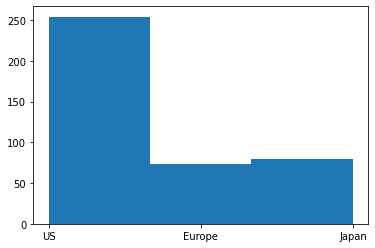

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.hist(str_targets, bins=3);

We see that US appears much more often - the dataset is highly unbalanced.

Accuracy metrics will not be informative in this case. F1-scores will be computed.

The shape of our dataset is as follows

In [19]:
print(data.shape)

(406, 7)


Split it into training and testing parts. 

No validation will be performed.

In [20]:
from sklearn.model_selection import train_test_split

p_test = 0.2

n_test = round(len(data) * p_test)

X_train, X_test, y_train, y_test = train_test_split(
    data, targets, random_state=0, test_size=n_test, shuffle=True)

print(X_train.shape)
print(X_test.shape)

(325, 7)
(81, 7)


Finally, create a model and train it.

In [21]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

This is a performance evaluation.

In [22]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred, target_names=unique_targets, digits=3))

              precision    recall  f1-score   support

      Europe      0.500     0.308     0.381        13
          US      0.955     0.792     0.866        53
       Japan      0.448     0.867     0.591        15

    accuracy                          0.728        81
   macro avg      0.634     0.656     0.613        81
weighted avg      0.788     0.728     0.737        81



We see that the model revels good only US cars. Corresponding precision and recall are 96 percent and 79 percent, respectively. 

For other cars the performance is not so good.

The reason is small support, i.e., small number of samples from Japan and Europe, 15 and 13, respectively. 

The estimates of mean value and standard deviation for such small number of samples are not so representative.

### Strengths and weaknesses of naive Bayes classifier

Strong points:

- Easy to implement, works fast
- Can be used on datasets with combined categorical and numerical data (Gaussian probabilities are combined with the multinomial)

Weak points:

- If categorical variable has a category, which was not observed in training data set, then model will assign a 0 (zero) probability and will be unable to make a prediction. Artificial fix is required, e.g., pseudocount.
- Computed values can be used only for finding maximum likelihood. Estimated probabilities are not to be taken too seriously
    
Applications of naive Bayes classifiers:

- Real time Prediction: Naive Bayes is an eager learning classifier and it is sure fast. Thus, it could be used for making predictions in real time.
- Multi class Prediction: This algorithm is also well known for multi class prediction feature. 
- Text classification, spam filtering, sentiment analysis: Naive Bayes classifiers mostly used in text classification (due to better result in multi class problems and independence rule) have higher success rate as compared to other algorithms. As a result, it is widely used in Spam filtering (identify spam e-mail) and Sentiment Analysis (in social media analysis, to identify positive and negative customer sentiments)
- Recommendation system: Naive Bayes classifier are used to predict whether a user would like a given resource or not

### Exercises

1\. Describe in writing what an assumption is made when a naive Bayes classifier is created. Why the classifier is naive?

2\. Describe in writing what means maximum likelihood?

3\. Make a copy of a naive Bayes classifier that we used above to create a spam filter and try to improve its performance.
Split the data set into training, validation and test data. Select the best model using the validation dataset and then compute your final score on the testing data. To improve the model for example the whole message content can be taken into account instead of the subject only. Also lengths of tokens that are taken into account can be varied. May be it would be interesting to split the messages into digramms: couples of words going one after another. And so on.

4\. Try to improve the Gaussian naive Bayes classifier. Split the data set into training, validation and test data. Select the best model using the validation dataset and then compute your final score on the testing data. 

5\. Previously we discussed that in the most cases data must be standardized before creation of a machine learning model. Why it does not influences the performance of a Gaussian naive Bayes classifier?